In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
original_cur_dir = getcwd()
chdir('..')
from ResultsAnalyzer import ResultsAnalyzer
chdir(original_cur_dir)

# General configuration

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
dataset_name = 'GeneratedNetwork'
experiment_main_dir = 'Experiment'
anom_comm_names = [f'comm0{i+1}' for i in range(110, 120)]

In [5]:
res_analyzer = ResultsAnalyzer(
    dataset_name = dataset_name,
    experiment_dir_path = experiment_main_dir, 
    experiment_settings = EXPERIMENT_SETTINGS, 
    anomalous_comm_names = anom_comm_names)

# Meta-Features predictive ranking ability comparison

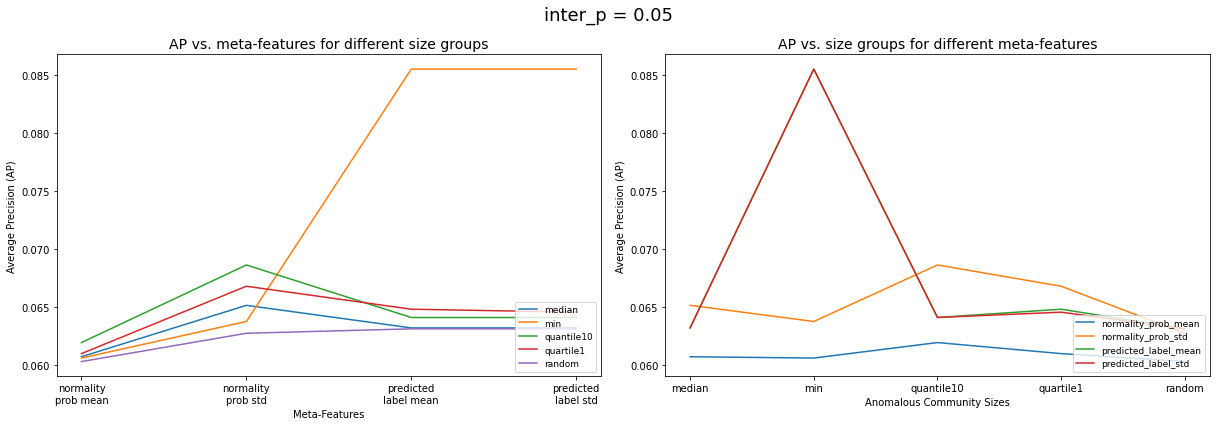

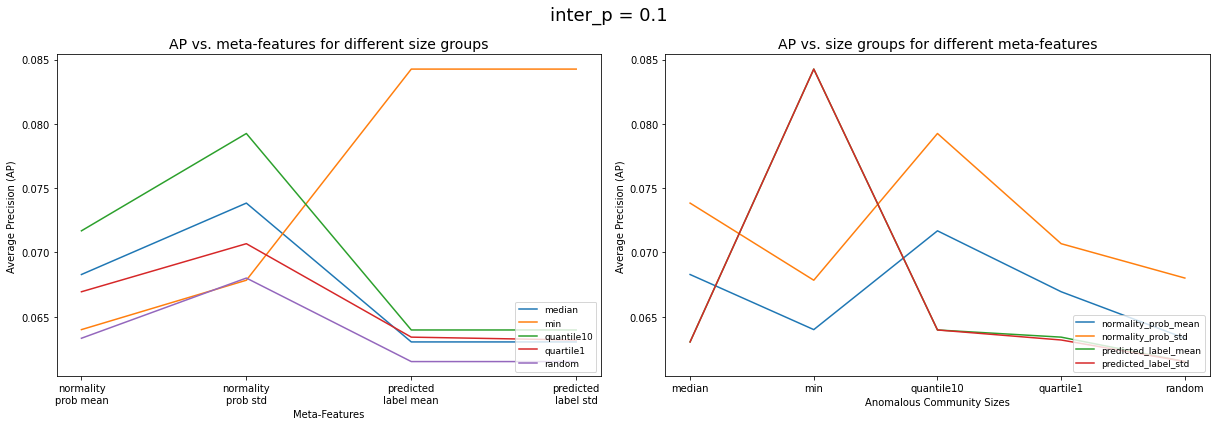

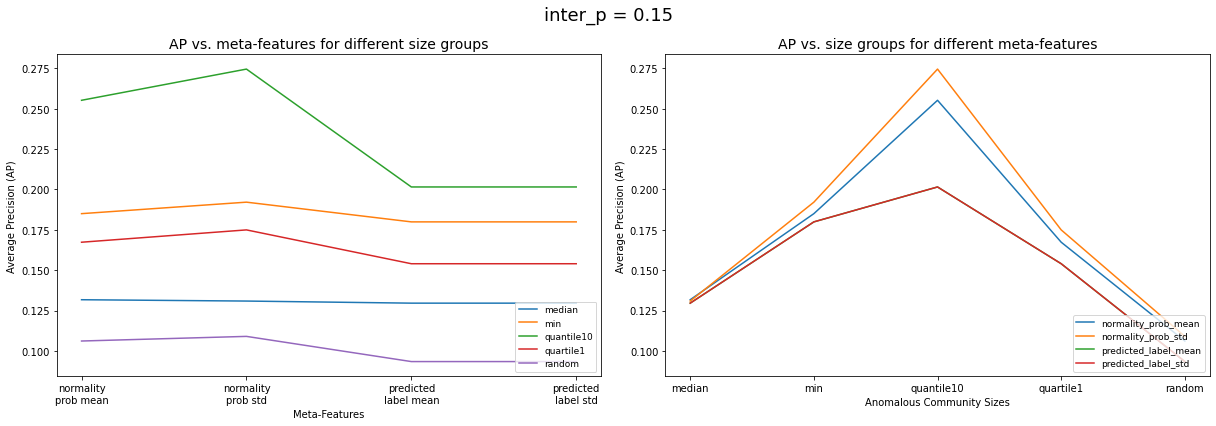

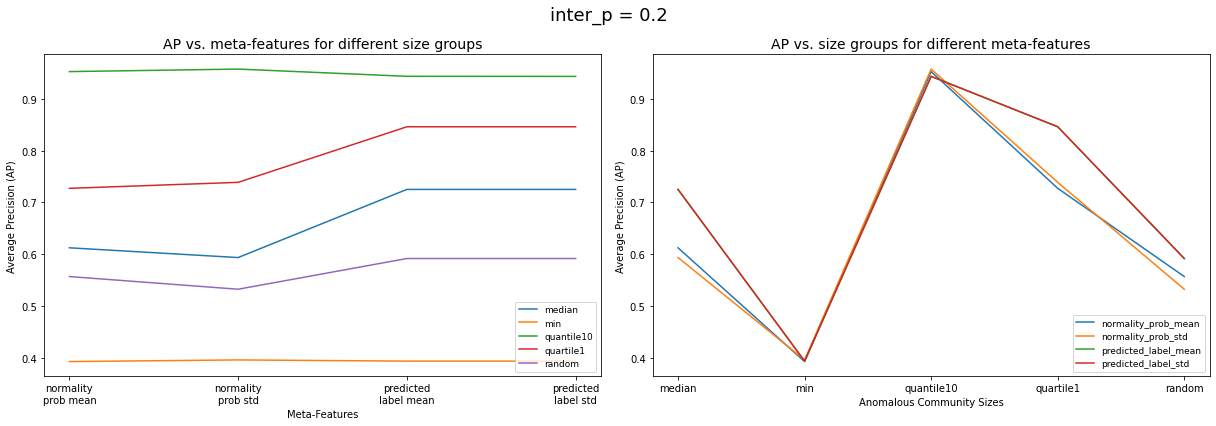

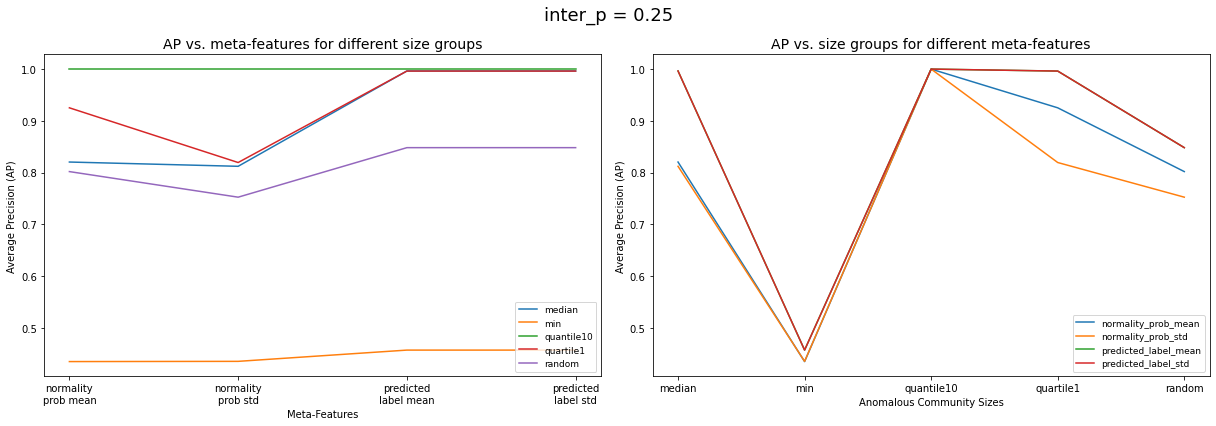

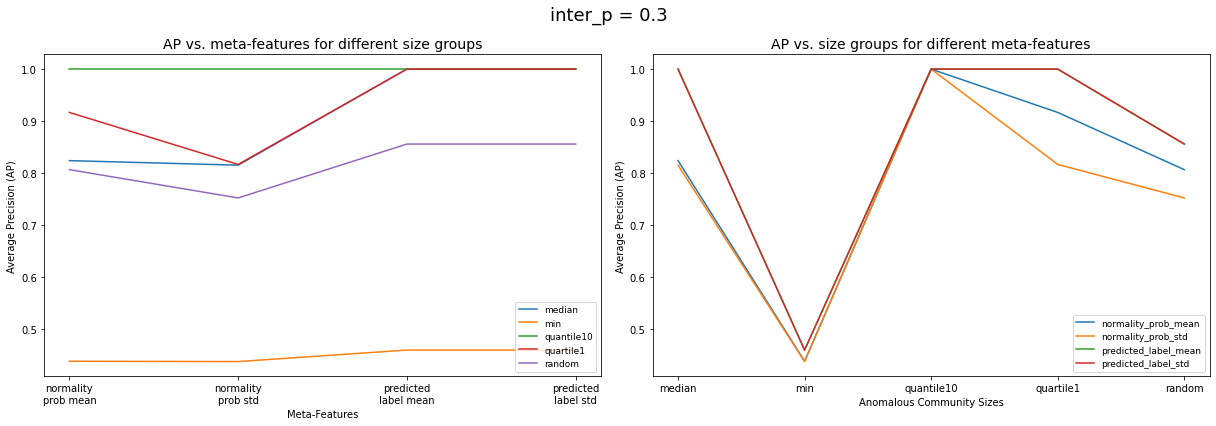

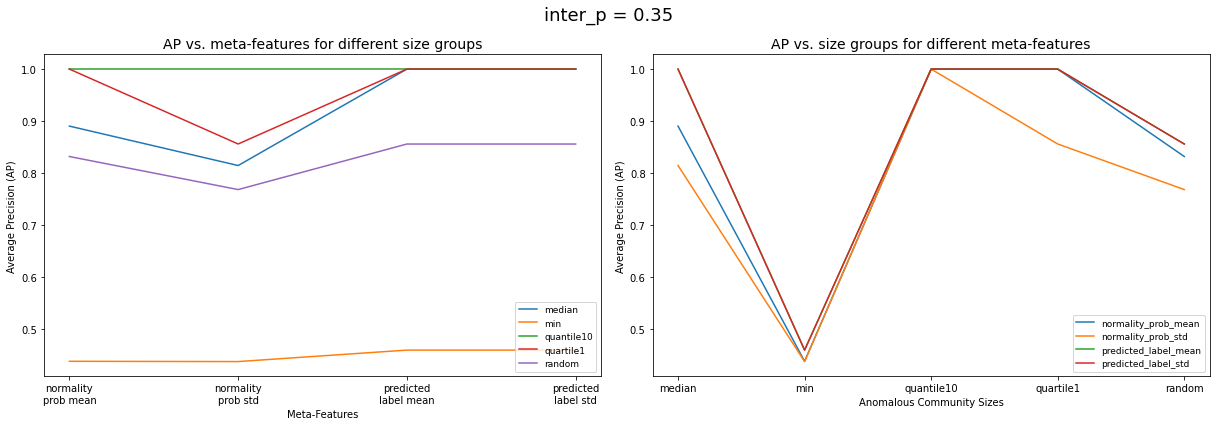

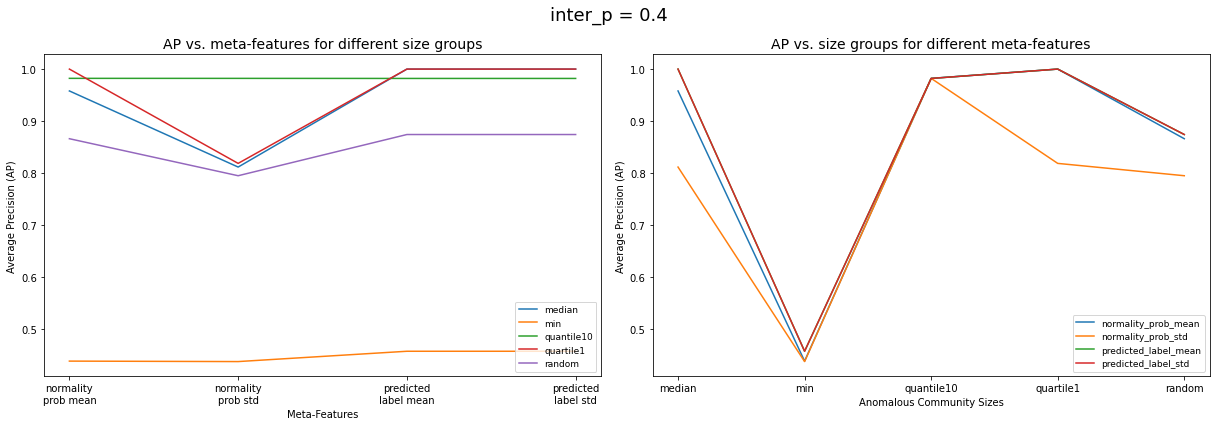

In [6]:
res_analyzer.plot_meta_features_comparison_grouped_by_ps_size_groups()

In [7]:
meta_features_comparison_df = res_analyzer.get_meta_features_comparison_df()
meta_features_comparison_df

,normality_prob_mean,normality_prob_std,predicted_label_mean,predicted_label_std
anom_inter_p,,,,
0.050,0.061,0.065,0.068,0.068
0.100,0.067,0.072,0.067,0.067
0.150,0.169,0.176,0.152,0.152
0.200,0.649,0.644,0.700,0.700
0.250,0.796,0.764,0.859,0.859
0.300,0.797,0.764,0.863,0.863
0.350,0.832,0.775,0.863,0.863
0.400,0.849,0.769,0.863,0.863


In [8]:
meta_features_comparison_df

,normality_prob_mean,normality_prob_std,predicted_label_mean,predicted_label_std
anom_inter_p,,,,
0.050,0.061,0.065,0.068,0.068
0.100,0.067,0.072,0.067,0.067
0.150,0.169,0.176,0.152,0.152
0.200,0.649,0.644,0.700,0.700
0.250,0.796,0.764,0.859,0.859
0.300,0.797,0.764,0.863,0.863
0.350,0.832,0.775,0.863,0.863
0.400,0.849,0.769,0.863,0.863


In [9]:
meta_features_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,normality_prob_mean,normality_prob_std,predicted_label_mean,predicted_label_std
mean,0.527,0.504,0.554,0.554
median,0.722,0.704,0.780,0.780
std,0.361,0.335,0.385,0.385


predicted_label_mean is the best meta-feature

# Evaluate with different parameters 

## Anom_inter_p

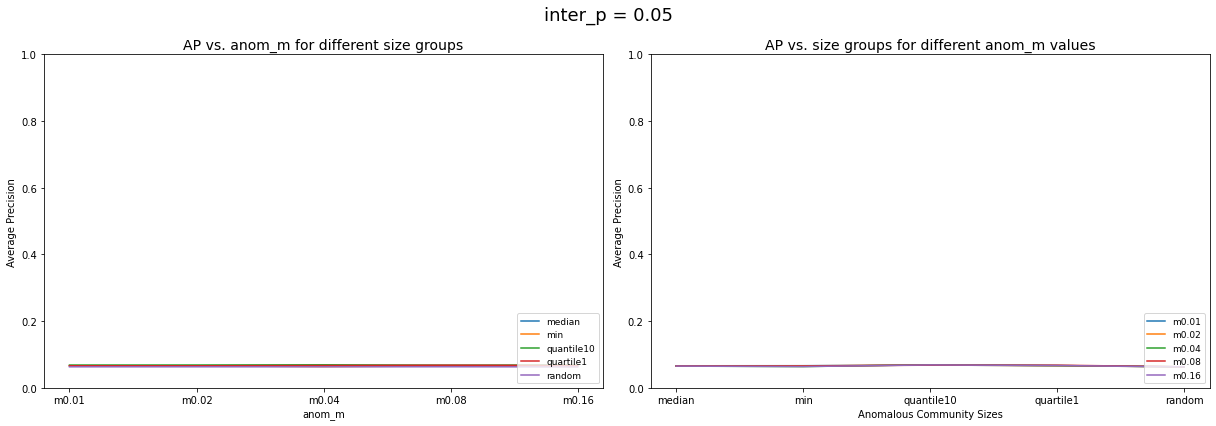

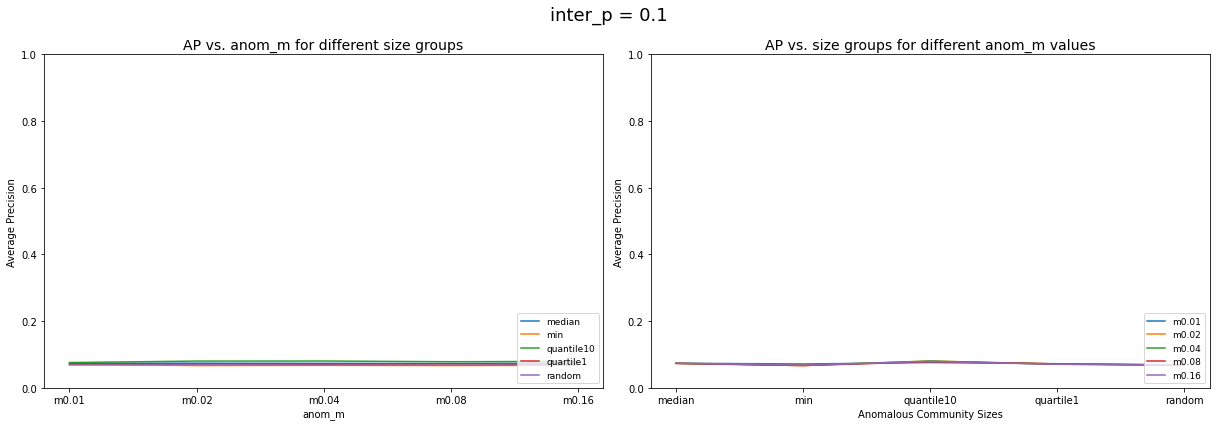

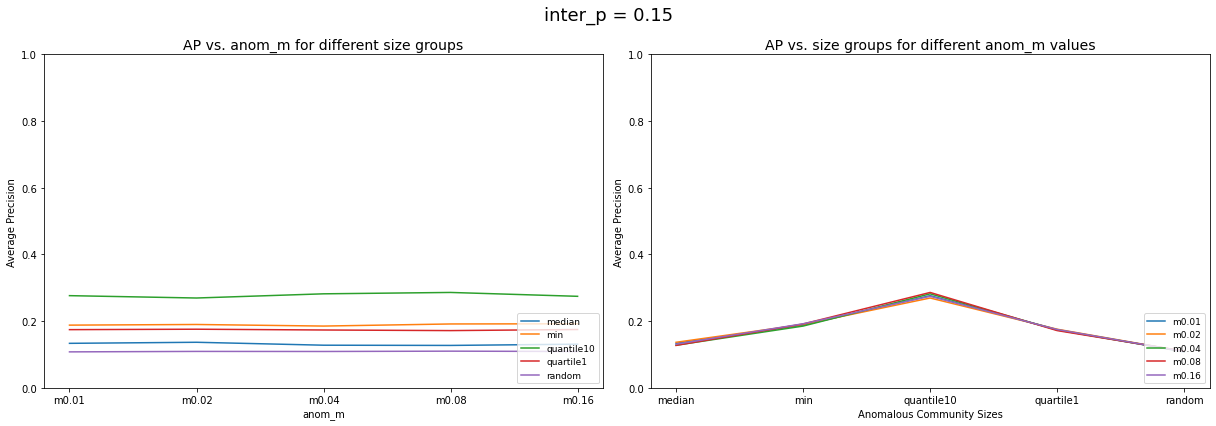

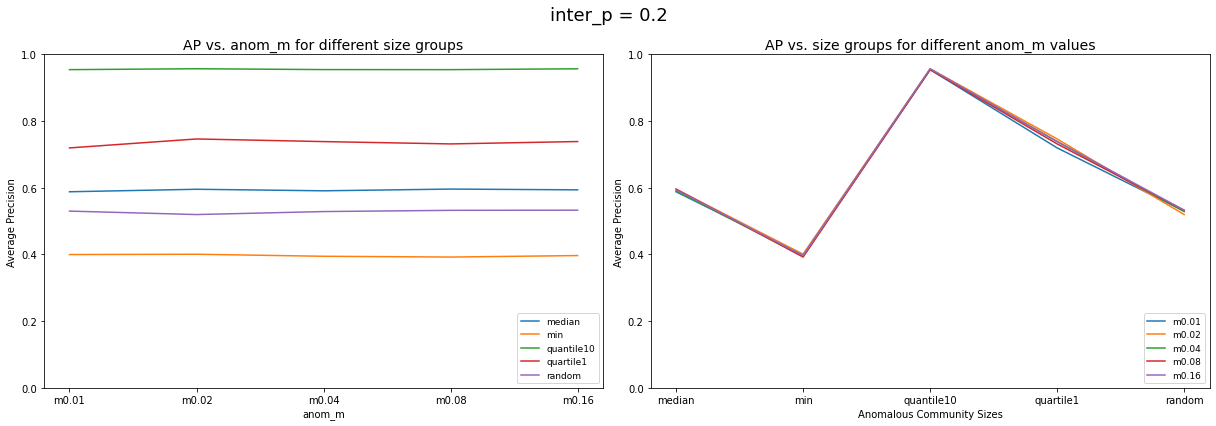

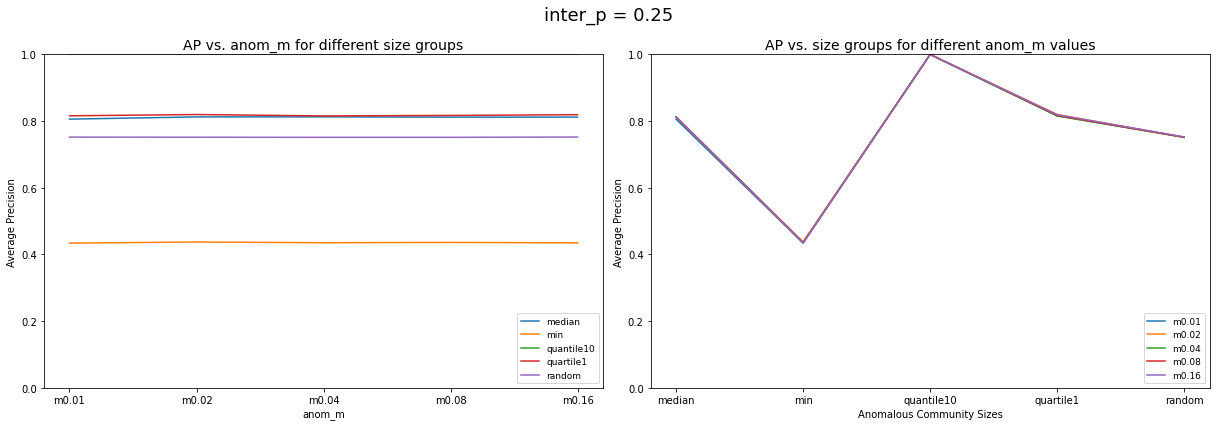

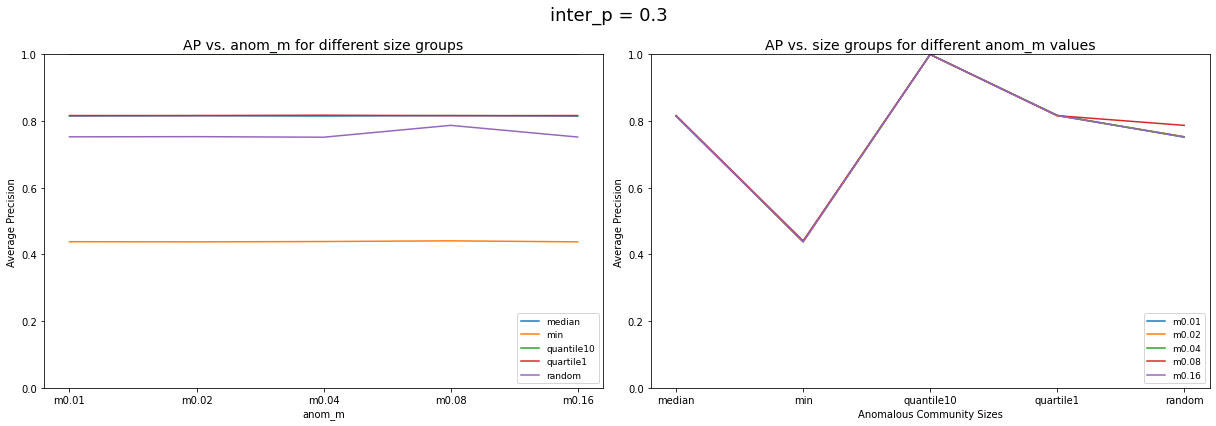

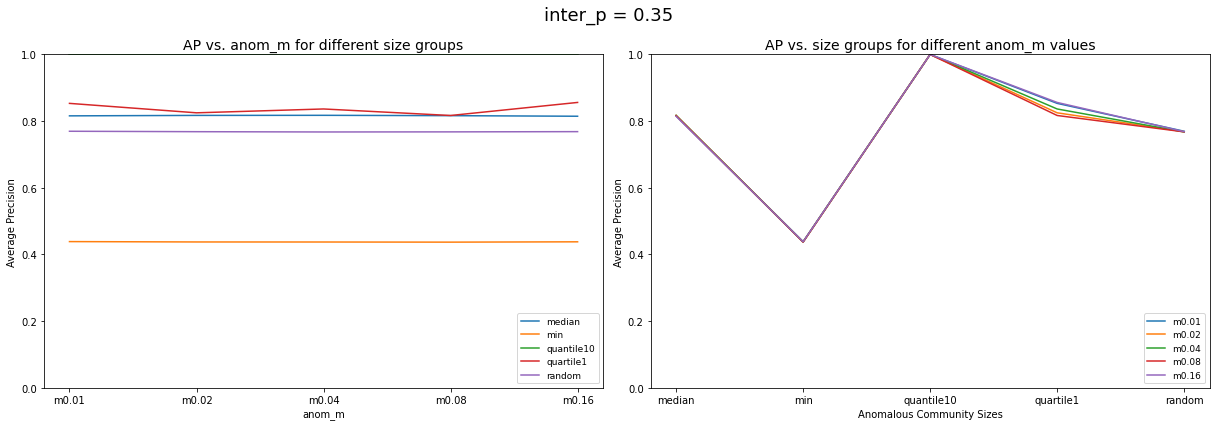

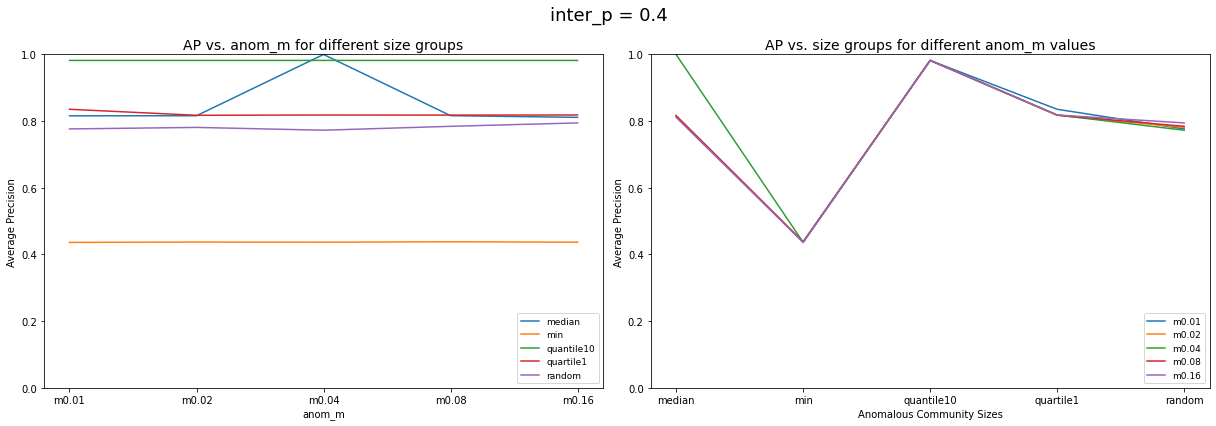

In [10]:
res_analyzer.plot_grouped_by_ps_ms_and_size_groups('normality_prob_std')

In [11]:
ps_comparison_df = res_analyzer.get_ps_comparison_df('normality_prob_std')
ps_comparison_df

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
size_group,,,,,,,,
min,0.065,0.068,0.189,0.397,0.436,0.439,0.438,0.437
quantile10,0.068,0.079,0.278,0.956,1.000,1.000,1.000,0.982
quartile1,0.067,0.071,0.174,0.735,0.818,0.817,0.838,0.822
median,0.065,0.074,0.131,0.593,0.811,0.816,0.816,0.852
random,0.063,0.068,0.109,0.529,0.752,0.760,0.768,0.782


In [12]:
ps_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
mean,0.066,0.072,0.176,0.642,0.763,0.766,0.772,0.775
median,0.065,0.071,0.174,0.593,0.811,0.816,0.816,0.822
std,0.002,0.004,0.065,0.213,0.205,0.204,0.206,0.203


## Anom_inter_m

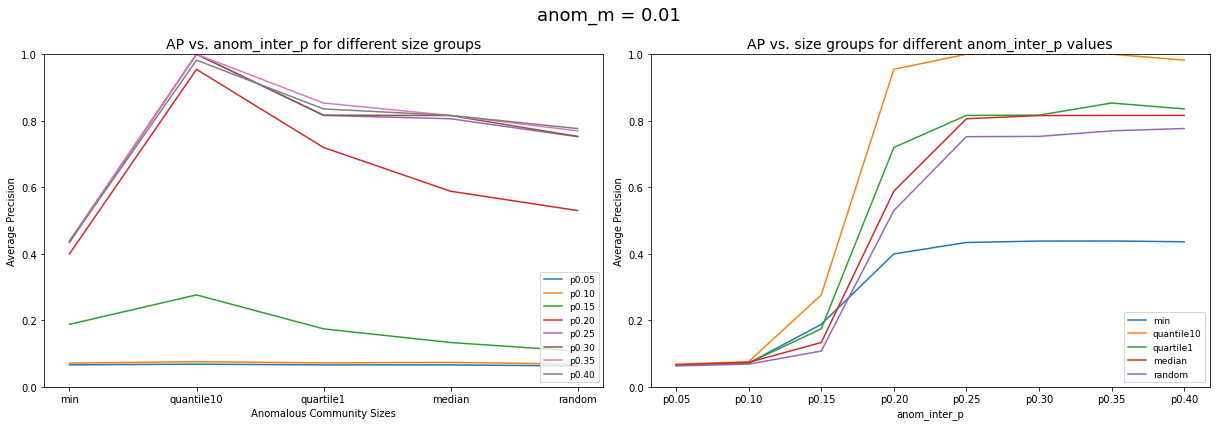

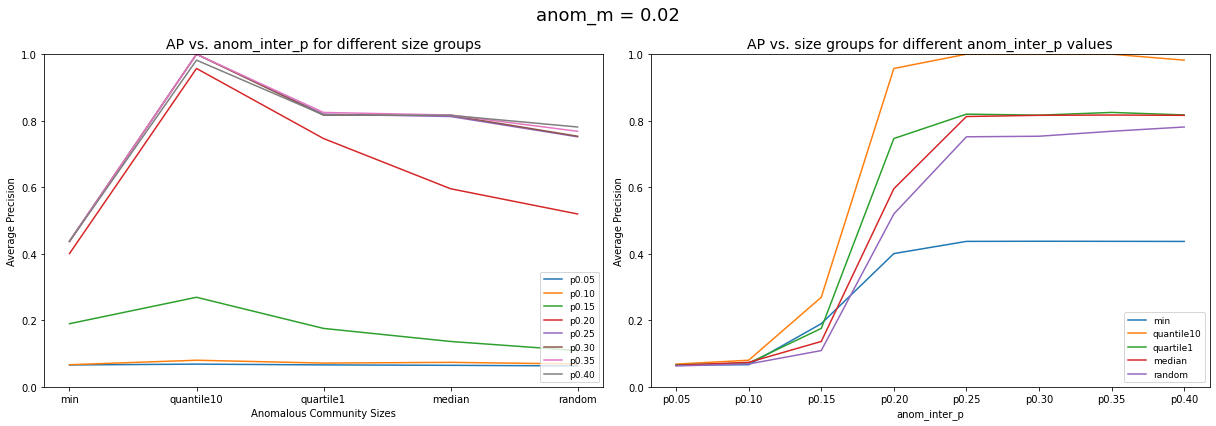

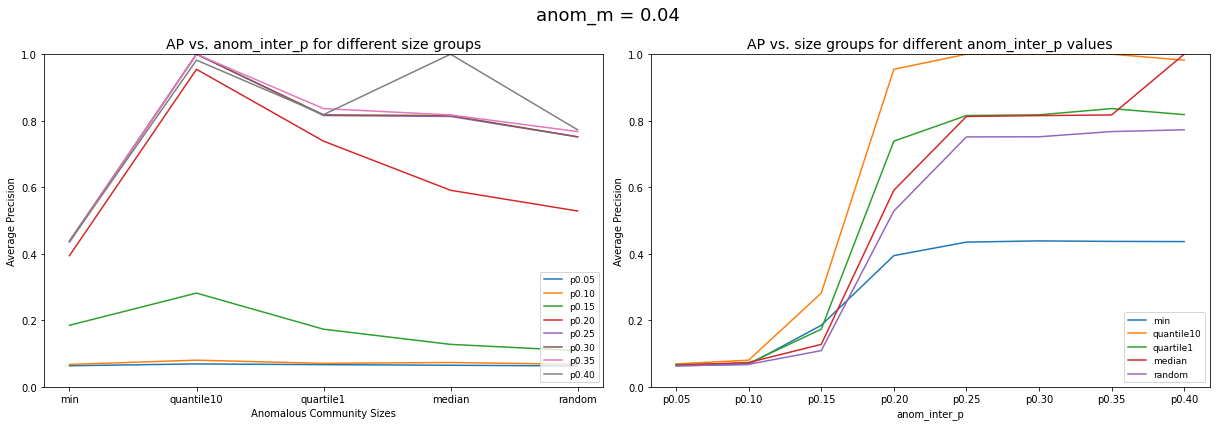

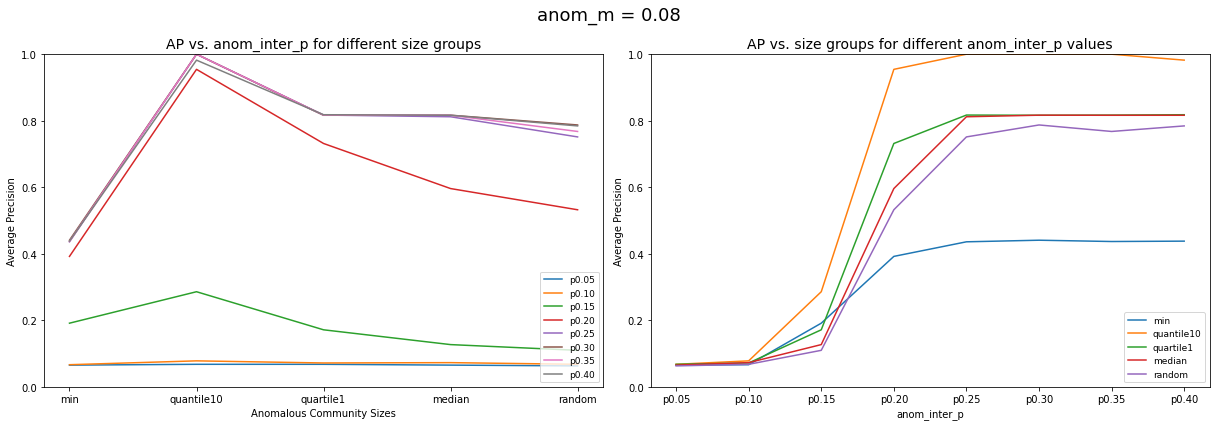

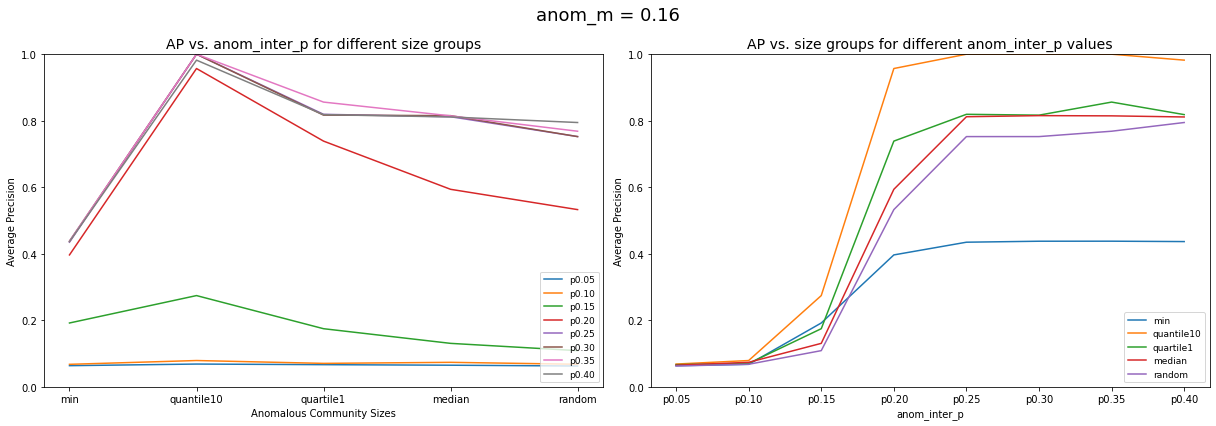

In [13]:
res_analyzer.plot_grouped_by_m_ps_and_size_groups('normality_prob_std')

In [14]:
ms_comparison_df = res_analyzer.get_ms_comparison_df('normality_prob_std')
ms_comparison_df

,0.01,0.02,0.04,0.08,0.16
anom_inter_p,,,,,
p0.05,0.066,0.066,0.065,0.066,0.065
p0.10,0.072,0.072,0.072,0.072,0.072
p0.15,0.176,0.176,0.175,0.177,0.176
p0.20,0.638,0.644,0.642,0.641,0.644
p0.25,0.762,0.764,0.763,0.763,0.764
p0.30,0.765,0.765,0.765,0.772,0.764
p0.35,0.775,0.770,0.772,0.768,0.775
p0.40,0.769,0.767,0.802,0.768,0.769


In [15]:
ms_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.01,0.02,0.04,0.08,0.16
mean,0.503,0.503,0.507,0.503,0.504
median,0.700,0.704,0.702,0.702,0.704
std,0.334,0.334,0.338,0.334,0.335


## Size groups

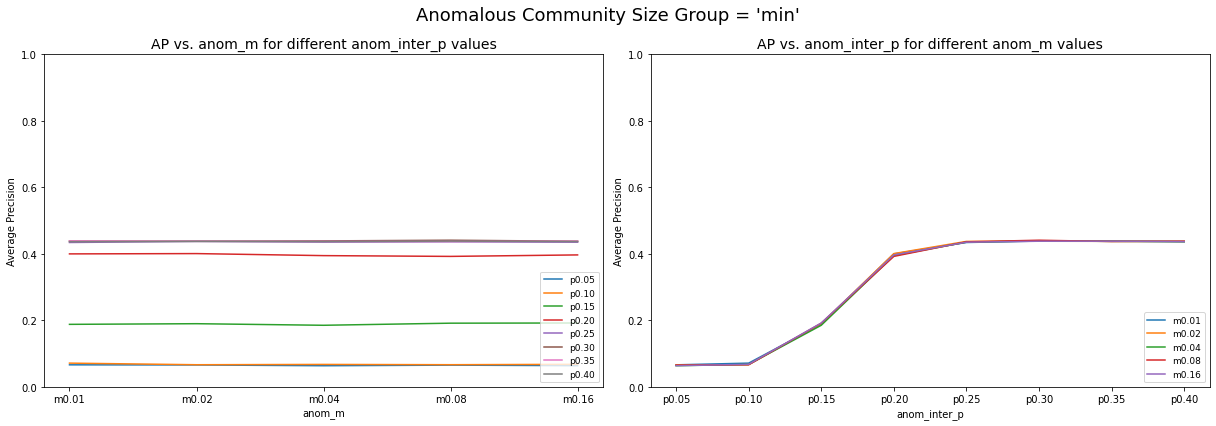

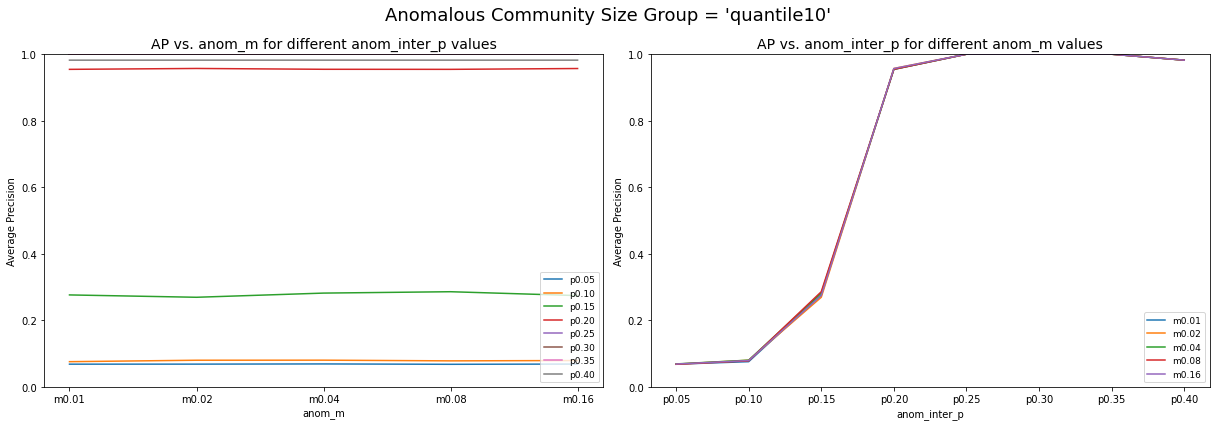

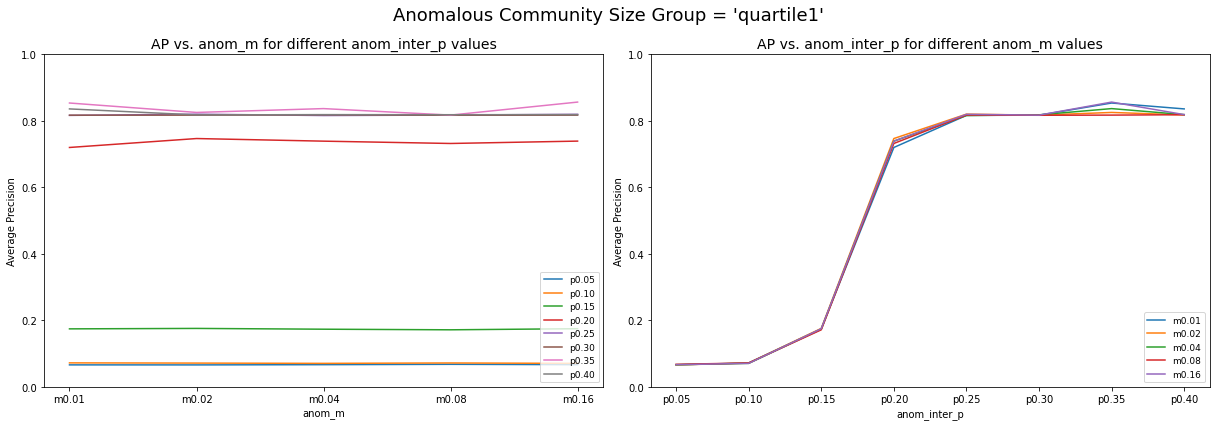

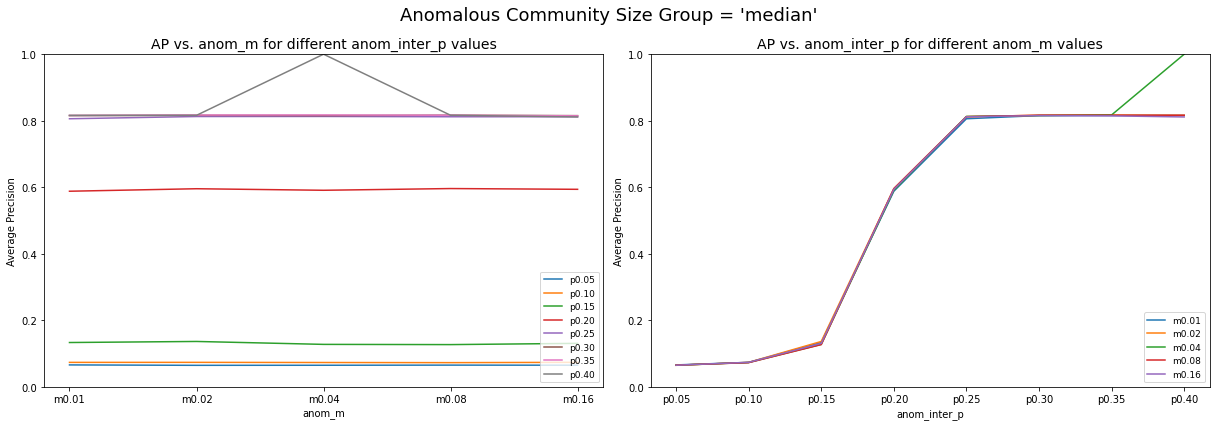

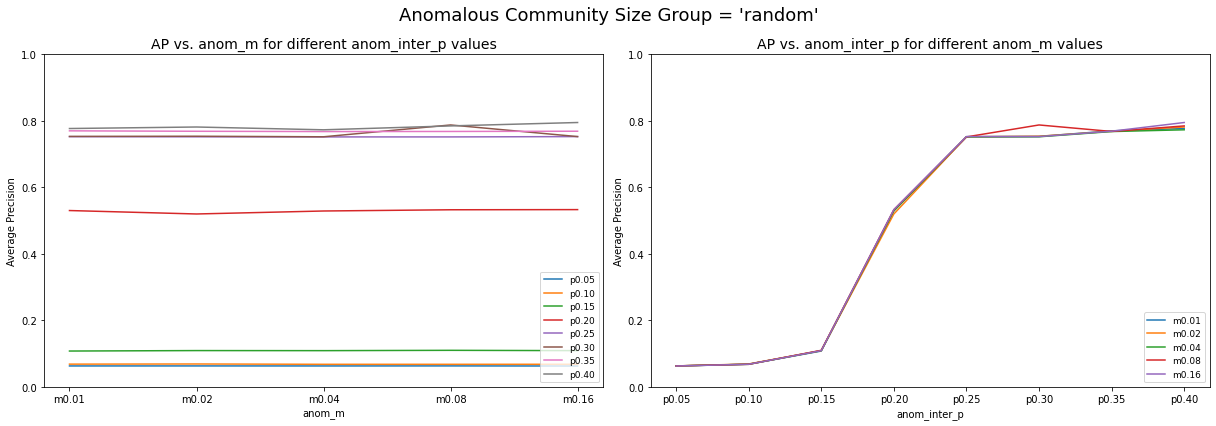

In [16]:
res_analyzer.plot_grouped_by_size_groups_ps_and_ms('normality_prob_std')

In [17]:
size_group_comparison_df = res_analyzer.get_size_groups_comparison_df('normality_prob_std')
size_group_comparison_df

,min,quantile10,quartile1,median,random
anom_m,,,,,
p0.05,0.065,0.068,0.067,0.065,0.063
p0.10,0.068,0.079,0.071,0.074,0.068
p0.15,0.189,0.278,0.174,0.131,0.109
p0.20,0.397,0.956,0.735,0.593,0.529
p0.25,0.436,1.000,0.818,0.811,0.752
p0.30,0.439,1.000,0.817,0.816,0.760
p0.35,0.438,1.000,0.838,0.816,0.768
p0.40,0.437,0.982,0.822,0.852,0.782


In [18]:
size_group_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,min,quantile10,quartile1,median,random
mean,0.309,0.670,0.543,0.520,0.479
median,0.416,0.969,0.776,0.702,0.640
std,0.171,0.443,0.366,0.365,0.340
